# Rutherford Scattering

In [25]:
from rutherford_scattering import rutherford_scattering_formula as rsf
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [26]:
def const_rsf(theta:float):
    half_theta = theta * 0.5
    return 1/(np.sin(half_theta)**4)

In [27]:
def corrected(theta,rates):
    return (2 * np.pi * np.sin(theta*(np.pi/180))) * rates

In [28]:
def f(x,a,b):
    return a/(np.sin(((x*(np.pi/180))-b)/2)**4)

In [29]:
  #correction = 1 #2 * np.pi * np.sin(x)
   # half_x = x * 0.5

In [30]:
def correction_factor(theta:float):
    return 2 * np.pi * np.sin(theta)

In [31]:
def func(x,a,b):
    return 2*np.pi*np.sin(x) * a * ((1/np.sin(((np.pi/360)*x)-b))**4)

In [32]:
# Experimental Data

angle_degrees = np.arange(-30,31,5) 
angle_degrees = angle_degrees[angle_degrees !=0]
experimental_rates = np.array([0.09214588,0.28542818,0.872165,2.757393,14.83362,34.50099,34.3564,28.86718,6.604176,1.716497,0.41211107,0.1425394])
corrections = correction_factor(angle_degrees)

In [33]:
coeff,_ = curve_fit(func,angle_degrees,experimental_rates)

In [34]:
corrected_rates = corrected(angle_degrees,experimental_rates)
corrected_rates

array([ -0.28948482,  -0.75792281,  -1.8742616 ,  -4.48409461,
       -16.184424  , -18.89328318,  18.81410343,  31.4959316 ,
        10.73976399,   3.68871075,   1.09431514,   0.44780073])

In [35]:
coef, _ = curve_fit(f,angle_degrees,corrected_rates)

In [36]:
coef

array([0.78077211, 1.77916637])

In [37]:
angle_degrees*(np.pi/180)

array([-0.52359878, -0.43633231, -0.34906585, -0.26179939, -0.17453293,
       -0.08726646,  0.08726646,  0.17453293,  0.26179939,  0.34906585,
        0.43633231,  0.52359878])

In [38]:
angles = np.linspace(-30,30,10000)


In [39]:
theory_theta = np.linspace(-1,1,10000)

theory_rsf = const_rsf(theory_theta*np.pi)


In [40]:
const_rsf(np.pi/3)

np.float64(16.000000000000007)

In [41]:
theory_rsf

array([1.        , 1.0000002 , 1.00000079, ..., 1.00000079, 1.0000002 ,
       1.        ], shape=(10000,))

In [42]:
f(theory_theta*np.pi,*coef)

array([1.96663636, 1.96666941, 1.96670247, ..., 2.34940169, 2.34944587,
       2.34949004], shape=(10000,))

In [43]:
coef

array([0.78077211, 1.77916637])

In [44]:
# fig,ax = plt.subplots(figsize=(6,6))
# ax.scatter(angle_degrees,experimental_rates,c="red",marker='x',s=5)
# #ax.scatter(theory_theta*180,f(theory_theta*np.pi,*coef),c="red",marker='x',s=5)
# #ax.semilogy(theory_theta*180,theory_rsf)
# ax.semilogy(theory_theta*180,func(theory_theta*180,*coeff))
# ax.set_yscale('log')
# ax.set_xlim(-31,31)
# ax.set_ylim(0,1e5)
# plt.show()

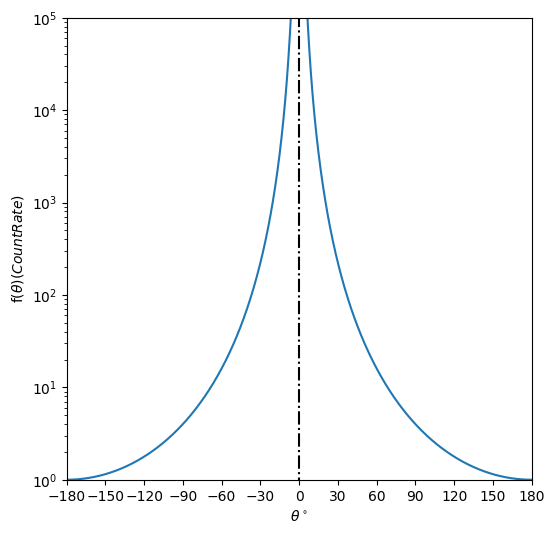

In [45]:
fig,ax = plt.subplots(figsize=(6,6))
ax.semilogy(theory_theta*180,theory_rsf)
#ax.semilogy(angle_degrees,experimental_rates,ls="none",c="red",label="Experimental")
ax.set_xlabel("$\\theta ^\\circ$")
ax.set_ylabel("$\\text{f}(\\theta) (Count Rate)$")
ax.set_xlim(-180,180)
ax.set_ylim(1,1e5)
ax.set_xticks(np.arange(-180,181,30))
ax.vlines(0,-1e100,1e100,color="black",ls="dashdot")

plt.show()


## 1.3 Atomic Number of Aluminium

In [46]:
def atomic_number(atomic_conc_1:float,atomic_conc_2:float,foil_thickness_1:float,foil_thickness_2:float,atomic_num_1:int,count_1:int,count_2:int):
    count_ratio = count_1/count_2
    numerator = atomic_conc_1 * foil_thickness_1 * (atomic_num_1**2)
    denominator = atomic_conc_2 * foil_thickness_2 * (1/count_ratio)
    return numerator/denominator


In [47]:
def scattering_rate_angle(x,a,b):
    return a/(np.sin((x+b)/2)**4)

integrate over ring

$$\pi r_1^2 - \pi r_2^2$$

$$\pi(r_{out}-r_{in})^2$$

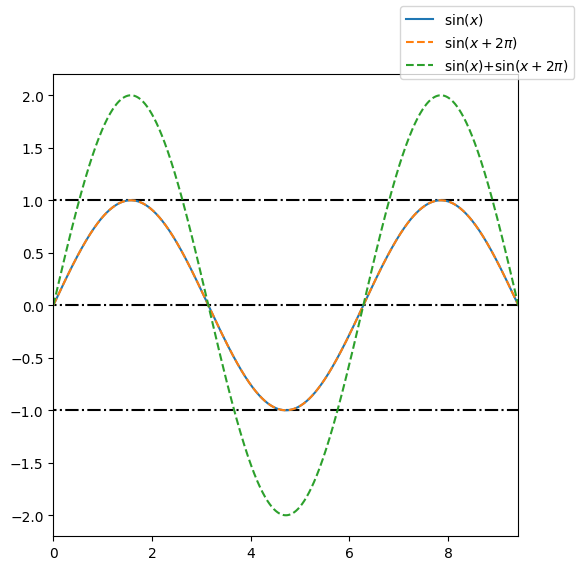

In [48]:
x = np.linspace(0,3*np.pi,10000)
fig, ax = plt.subplots(figsize=(6,6))
ax.hlines([0,1,-1],-1_000_000,1_000_000,ls="dashdot",colors=["black"])
ax.plot(x,np.sin(x),label="sin($x$)")
ax.plot(x,np.sin(x+2*np.pi),label="sin($x + 2\\pi$)",ls="dashed")
ax.plot(x,(np.sin(x)+np.sin(x+2*np.pi)),ls="dashed",label="sin($x$)+sin($x+2\\pi$)")
ax.set_xlim(0,3*np.pi)
fig.legend()
plt.show()